<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Clustering_HierarchicalAgglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning - Clustering

A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group.

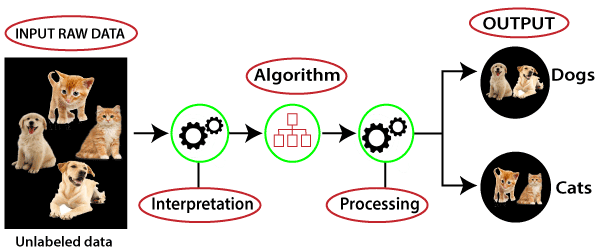

##Agglomerative Hierarchical Clustering

In hierarchical clustering, we have a concept called a proximity matrix. This stores the distances between each point. 

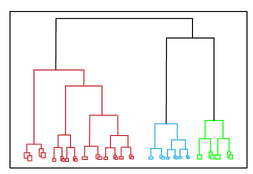

Steps in aglomerative clustering :

    1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K,
     while K is an integer representing the number of data points.
    2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
    3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
    4. Repeat the above three steps until one big cluster is formed.Once single cluster is formed,
      dendrograms are used to divide into multiple clusters depending upon the problem. 
      We will study the concept of dendrogram in detail in an upcoming section.

In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

###Agglomerative Clustering on dummy data

In [ ]:
df=pd.DataFrame({"value":[8,5,15,18,20]},index=[1,2,3,4,5])
df.head()

,value
1,8
2,5
3,15
4,18
5,20


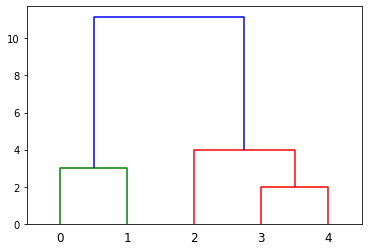

In [ ]:
den=hierarchy.dendrogram(hierarchy.linkage(df[["value"]],method='average'))

Conclusion :

    We can try out selecting different possible number of clusters

In [ ]:
model=AgglomerativeClustering(n_clusters=2)
model.fit(df[["value"]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
data=df
data["2 cluster Label"]=model.labels_
data.head()

,value,2 cluster Label
1,8,1
2,5,1
3,15,0
4,18,0
5,20,0


In [ ]:
model=AgglomerativeClustering(n_clusters=3)
model.fit(df[["value"]])

data["3 cluster Label"]=model.labels_

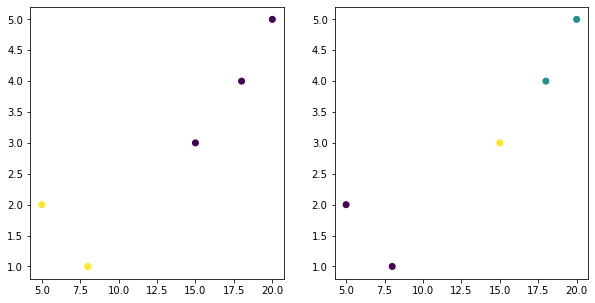

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df['value'],df.index,c=df['2 cluster Label'])
plt.subplot(1,2,2)
plt.scatter(df['value'],df.index,c=df['3 cluster Label'])

Conclusion :

    We can observe 2 clusters fits well.

###Agglomerative Clustering on Glass data

In [ ]:
df = pd.read_csv('/content/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#Original labels
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data=df.drop(columns='Type')

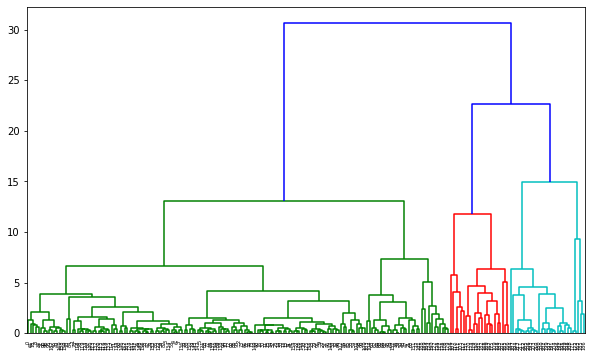

In [ ]:
#Draw dendrogram
fig=plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(data,method='ward'))

In [ ]:
model=AgglomerativeClustering(n_clusters=6)
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=6)

In [ ]:
data['6 cluster labels']=model.labels_
data["Type"]=df['Type']
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,6 cluster labels,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


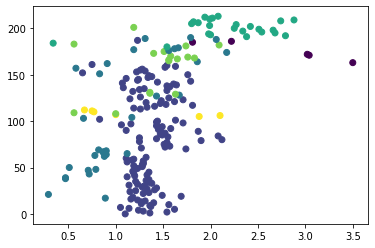

In [ ]:
plt.scatter(data['Al'],data.index,c=model.labels_)

###Agglomerative Clustering on Mall customer data

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["Genre"]=df["Genre"].map({"Male":1,"Female":0})
X=df[["Annual_Income_(k$)","Spending_Score"]]

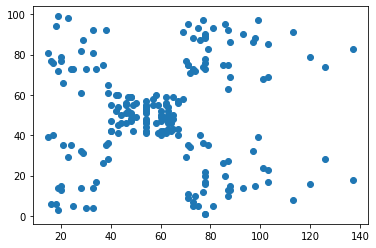

In [ ]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

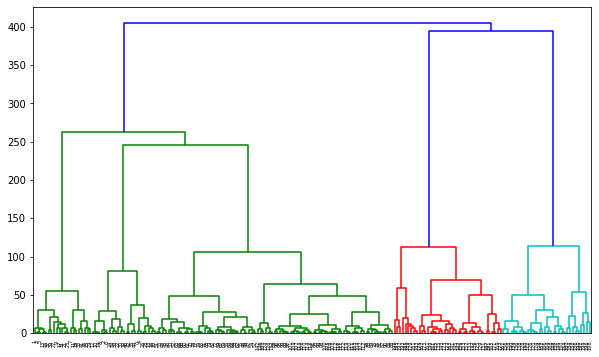

In [ ]:
fig=plt.figure(figsize=(10,6))
den=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [ ]:
model=AgglomerativeClustering(n_clusters=5)
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

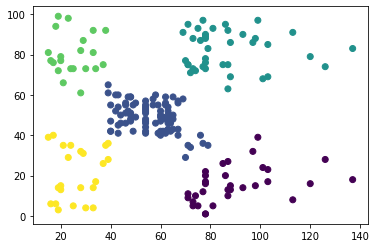

In [ ]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],c=model.labels_)